<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 1*

---

# 벡터와 매트릭스 ( Vectors and Matrices )

## 🏆 학습 목표 

- 데이터사이언스와 선형대수의 관계를 알 수 있다.
- 벡터에 대한 기본 계산을 할 수 있다.
- 매트릭스에 대한 기본 계산을 할 수 있다.
- 단위행렬 (Identity matrix)와 같은 특별한 매트릭스를 이해하고, 행렬식 (determinant)이나, 역행렬을 (inverse)계산 할 수 있다.
- NumPy를 사용하여 기본 선형대수 계산을 할 수 있다.

---


# 개요

<img src='https://i.imgur.com/knDqkR5.png' width = 500>

> 학생들의 시험 점수 데이터를 통해서 새로운 기말고사의 점수를 예측해본다

라는 문제를 푼다고 상상해보겠습니다.

이는 여러분들이 앞으로 배우게 될 개념 중 하나인 **regression**을 통해서 충분히 풀 수 있습니다.


<img src='https://www.researchgate.net/profile/Hieu_Tran33/publication/333457161/figure/fig3/AS:763959762247682@1559153609649/Linear-Regression-model-sample-illustration.ppm' width = 500>

당연히 해당 내용은 `numpy`, `pandas`, `scikitlearn`과 같은 라이브러리들을 통해 계산할 수 있을 겁니다.

그러나 우리는 먼저 본질적인 질문을 해야합니다.

과연 이러한 데이터를 어떻게 python에서 

- 표현하고, 

- 저장하고, 

- 계산 할 수 있을 것인가. 

라는 거죠.






## Data Structure


### 1D

여기서 중요한 것은 데이터의 순서는 (order) 유지 되어야 한다는 것 입니다.

가령 예측하고자 하는 기말고사의 점수인 87.5와 90.3 이 바뀐다면 아예 다른 문제가 되어버리겠죠.

사실 너무나도 익숙합니다만 우리는 일단 1차원 데이터를 표현하기 위해서 

아래와 같이 `list`라는 `data structure`를 사용하고 있습니다.

In [1]:
studentA = [89.9, 90.3, 85.1, 87.5]
studentB = [80.1, 84.0, 85.9, 85]

### 2D

만약, 우리가 조금 더 기억을 해본다면 위의 데이터를 `pandas`의 `dataframe`을 사용해서 조금 더 효율적으로 표현 할 수 있다는 것도 알 것입니다.



In [2]:
import pandas as pd
df = pd.DataFrame([
              [89.9, 90.3, 85.1, 87.5],
              [80.1, 84.0, 85.9, 85]
], index = ['studentA', 'studentB'], columns = ['mid1', 'mid2', 'mid3', 'final'])
df

,mid1,mid2,mid3,final
studentA,89.9,90.3,85.1,87.5
studentB,80.1,84.0,85.9,85.0


(불) 여기서 더 효율적이라는 것의 의미는 무엇일까요?

이는 **list 안에 list를 담는** `list`와는 또 다른 데이터 구조이며 `2차원 list`, `2차원 array`, `2차원 matrix` 등으로 표현 되기도 합니다. 

## Matrix Calculation

아마 거의 대부분의 데이터는 2차원 이상으로 표현 되기 때문에, 이러한 `matrix` 계산을 더 효율적이고, 쉽게 할 수 있는 방법들을 사용할 필요가 있습니다.

### Matrix multiplication

<img src="https://www.mathsisfun.com/algebra/images/matrix-multiply-ex1b.gif" width="400">


### Determinant 

#### 2x2

<img src="http://cdn.virtualnerd.com/tutorials/Alg2_04_01_0017/assets/Alg2_04_01_0017_D_01_16.png" width="400">

#### 3x3

<img src="https://www.thecalculator.co/includes/forms/assets/img/Matrix%20determinant%203x3%20formula.jpg" width='400'>

2차원 매트릭스에 대한 값을 계산 후 수를 곱하여 더함

#### 4x4 

<img src="https://semath.info/img/inverse_cofactor_ex4_02.jpg" width='400'>

3차원 매트릭스에 대한 값을 계산 후 수를 곱하여 더함 

#### 5x5 매트릭스

4차원 매트릭스에 대한 값을 계산 후 수를 곱하여 더함

...


...



## Regression (Section 2 에서 배움)

<https://en.wikipedia.org/wiki/Linear_regression>

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/704b31aa61dfc93d672f15bf02aa6d168be49643'>

<br>


<img src= "https://wikimedia.org/api/rest_v1/media/math/render/svg/917759911692e98ba477c3d669356525a84aace6" width="400">

**의미는 지금 당장은 몰라도 됩니다**

**의미는 지금 당장은 몰라도 됩니다**

**의미는 지금 당장은 몰라도 됩니다. 제발** (중요해서 3번 강조)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.DataFrame([
    [1,3,5,7,9],
    [2,8,14,20,26]],
    index = ['mid','final']
).T

df['ones'] = np.ones(5)

df

,mid,final,ones
0,1,2,1.0
1,3,8,1.0
2,5,14,1.0
3,7,20,1.0
4,9,26,1.0


In [4]:
X = df[['ones', 'mid']].values
Y = df['final'].values.reshape(-1, 1) # Transpose

# 위의 공식 계산
beta = np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.matmul(np.transpose(X), Y))

beta

array([[-1.],
       [ 3.]])

In [5]:
Y

array([[ 2],
       [ 8],
       [14],
       [20],
       [26]])

In [6]:
X

array([[1., 1.],
       [1., 3.],
       [1., 5.],
       [1., 7.],
       [1., 9.]])

이를 통해서, 
Y = X * beta (+ error) 라는 결과에 대입해보면

2 = (1 * -1) + (3 * 1)
8 = (1 * -1) + (3 * 3)
...

### Visualize Linear Regression

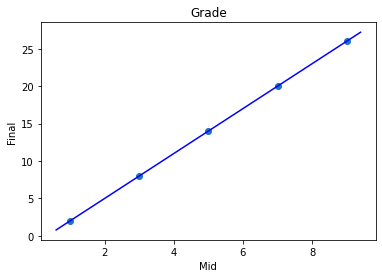

In [7]:
# Beta 를 변수로 저장
beta_0 = beta[0, 0]
beta_1 = beta[1, 0]

# 선으로 그림
plt.scatter(df['mid'], df['final'])
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = beta_0 + beta_1 * x_vals
plt.plot(x_vals, y_vals, '-', color='b')
plt.title('Grade')
plt.xlabel('Mid')
plt.ylabel('Final')
plt.show()

### Linear regression with Scipy 

In [8]:
from scipy import stats
stats.linregress([1, 3, 5, 7, 9], [2, 8, 14, 20, 26])

LinregressResult(slope=3.0, intercept=-1.0, rvalue=1.0, pvalue=1.2004217548761408e-30, stderr=0.0)

최신 기술, 라이브러리, 패키지등에 대해서 계속 연구해야 하는 이유입니다.

## Dimensionality Reduction : PCA, SVD 

사이즈가 큰 데이터셋을 사이즈가 작은 부분으로 나누는 작업 ( 일반적으로 시각화나 다른 모델링을 위해서 사용 )

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Singular_value_decomposition_visualisation.svg/220px-Singular_value_decomposition_visualisation.svg.png" width="400">

## 딥러닝 : CNN (Section 4 에서 배움)

"Convolving" 은 필터, 커널을 (작은 매트릭스) 통해 이미지를 축소화 하여 그 결과물을 분석에 사용 하는 방법입니다. 필터를 통해서 수정된 이미지는 특수한 부분이 "강조"되어 이미지 분석에 사용 될 수 있습니다. 이는 완전히 선형대수를 기반으로한 단계입니다. 


**의미는 지금 당장은 몰라도 됩니다**

**의미는 지금 당장은 몰라도 됩니다**

**의미는 지금 당장은 몰라도 됩니다. 제발** (중요해서 3번 강조)

<img src="https://thumbs.gfycat.com/SmoggyLittleFlickertailsquirrel-size_restricted.gif">

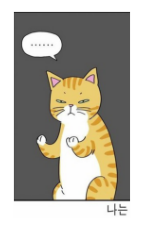

In [9]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as nd
from skimage.exposure import rescale_intensity
from skimage import color

img = imageio.imread('https://i.imgur.com/nItPxZp.png')
plt.axis('off')
plt.imshow(img);

### colab에 library 설치하기

아래와 같이 `!pip3 install ~~~`을 이용하면 됩니다. (이건 알아야합니다.)

In [10]:
!pip3 install imageio
!pip3 install skimage
!pip3 install scikit-image

ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


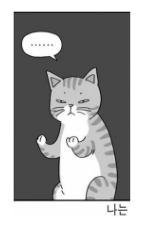

In [11]:
# 이미지를 흑백으로 치환, ( M*N*4 에서 M*N*1로 축소)
grayscale = color.rgb2gray(img)
plt.axis('off')
plt.imshow(grayscale, cmap=plt.cm.gray);

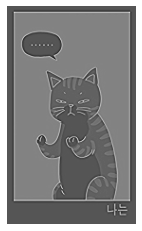

In [12]:
# 라플라시안 필터
laplacian = np.array([[0,0,1,0,0],
              [0,0,2,0,0],
              [1,2,-16,2,1],
              [0,0,2,0,0],
              [0,0,1,0,0]])

laplacian_image = nd.convolve(grayscale, laplacian)
plt.axis('off')
plt.imshow(laplacian_image, cmap=plt.cm.gray);

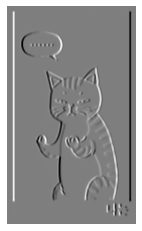

In [13]:
# sobel filter (y axis)
sobel_x = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])

sobel_x_image = nd.convolve(grayscale, sobel_x)
plt.axis('off')
plt.imshow(sobel_x_image, cmap=plt.cm.gray);

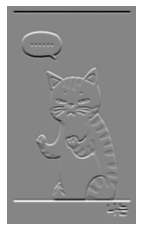

In [14]:
# sobel filter (y axis)
sobel_y = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])

sobel_y_image = nd.convolve(grayscale, sobel_y)
plt.axis('off')
plt.imshow(sobel_y_image, cmap=plt.cm.gray);

# 스칼라, 벡터 

- 스칼라와 벡터는 선형 대수를 구성하는 기본 단위입니다. 
- 스칼라는 단순히 변수로 저장되어 있는 숫자이며 벡터 혹은 매트릭스에 곱해지는 경우 해당 값에 곱한 값으로 결정됩니다.
- 한편 벡터는 파이썬에서는 주로 `list`로 사용 되며, 이전에 다뤘던 것처럼 데이터셋을 구성하고 있는 데이터프레임의 행/열로써 사용되기도 합니다. 
- 매트릭스는 벡터의 모음으로 간주 될 수도 있기 때문에 벡터를 이해하는 것은 매우 중요합니다.

### 스칼라

단일 숫자이며, 변수에 저장 할때는 일반적으로 소문자를 이용하여 표기합니다. 

스칼라는 실수와 정수 모두 가능합니다.

\begin{align}
a = 5
\qquad
b = 1.81
\qquad
c = -3.12\mathrm{e}{+23}
\qquad
d = \pi
\end{align}

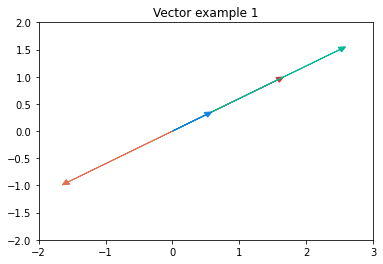

In [15]:
import math
import matplotlib.pyplot as plt
import numpy as np

# 시작 벡터 (0,0) 기준
blue = [.5, .3] 

# 스칼라를 곱함
green = np.multiply(5, blue)
red = np.multiply(math.pi, blue)
orange = np.multiply(-3.12, blue)

# 스케일이 바뀐 벡터를 그림
plt.arrow(0, 0, red[0], red[1], head_width = .1, head_length = .1, color = '#d63031')
plt.arrow(0, 0, green[0], green[1], head_width = .1, head_length = .1, color = '#00b894')
plt.arrow(0, 0, blue[0], blue[1], head_width = .1, head_length = .1, color = '#0984e3')
plt.arrow(0, 0, orange[0], orange[1], head_width = .1, head_length = .1, color = '#e17055')
plt.xlim(-2, 3)          
plt.ylim(-2, 2)
plt.title("Vector example 1")
plt.show()

### 벡터

- *n* 차원의 벡터는 **컴포넌트**라 불리는 *n*개의 원소를 가지는 **순서를 갖는** 모음입니다. (컴포넌트는 스칼라로 간주 되지 않습니다.) 
- 벡터는 일반적으로 위의 화살표 (→) 를 갖는 소문자의 형태로 표현 됩니다. 

예시: $\vec{v}$ 

\begin{align}
   \vec{a} = 
   \begin{bmatrix}
           8\\
           9
    \end{bmatrix}
    \qquad
    \vec{b} =
    \begin{bmatrix}
          -4\\
           7\\
           1
    \end{bmatrix}
    \qquad
    \vec{c} =
    \begin{bmatrix}
           5.5332
    \end{bmatrix}
    \qquad
    \vec{d} =
    \begin{bmatrix}
           Pl\\
           x\\
           y\\
           \frac{2}{3}
    \end{bmatrix}
\end{align}

위의 벡터들은 각각 2, 3, 1, 4차원을 가지고 있습니다.

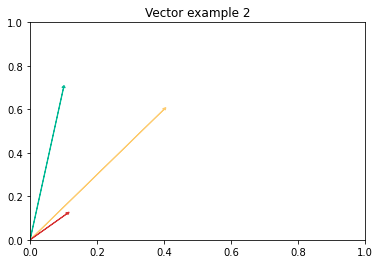

In [16]:
# 벡터 예시
yellow = [.4, .6]
red = [.11, .12]
blue = [.1, .7]

plt.arrow(0, 0, .4, .6, head_width = .01, head_length = .01, color = '#fdcb6e')
plt.arrow(0, 0, .11, .12, head_width = .01, head_length = .01, color = '#d63031')
plt.arrow(0, 0, .1, .7,  head_width = .01, head_length = .01, color = '#00b894')
plt.title('Vector example 2')
plt.show()

- 물리학의 관점에서, 벡터는 방향과 크기라는 2가지 속성을 갖고 있습니다. 

- 데이터 사이언스에서 이러한 물리적인 내용을 다루는 일은 거의 없지만, 지금은 벡터의 길이(length)는 벡터의 차원수와 동일하다는 정도만 이해하시면 좋습니다. 


#### 3D Vector

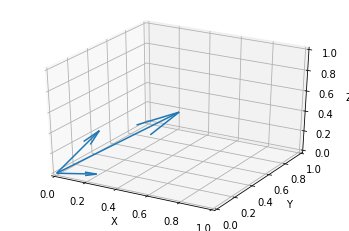

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 3번째 요소 추가 
yellow = [.4, .6, .5]
red = [.11, .12, .3]
blue = [.1, .7, .4]

vectors = np.array([[0, 0, 0, .5, .5, .5], 
                    [0, 0, 0, .2, .1, .0],
                    [0, 0, 0, .1, .3, .3]])

X, Y, Z, U, V, W = zip(*vectors) # 몰라도 됩니다. 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

#### 벡터의 크기 (Magnitude, Norm, Length)

- 벡터의 *Norm* 혹은 *Magnitude*는 단순히 **길이**에 지나지 않습니다. 
- 벡터는 선이기 때문에 피타고라스를 기억하는 것으로 길이를 구할 수 있죠. 
- 벡터의 길이를 구하는 방법을 일반화 하면 다음과 같습니다.

벡터의 크기를 표현 할때는 || 를 사용합니다.

> v = [1,2,3,4]
>
> |v| = $\sqrt{ 1^2 + 2^2 + 3^2 + 4^2 }$
>
> |v| = 30

즉, 벡터의 크기는 모든 원소의 제곱을 더한 후 루트를 씌운 값입니다.

벡터 크기의 특징은 다음과 같습니다

> $||x|| \geq 0$ 
>
> $||x|| = 0$ (모든 원소가 0)
>
> 삼각 부등식: $|| x + y ||\leq ||x|| + ||y||$


#### 벡터의 내적 ( Dot Product )

두 벡터 $\vec{a}$ 와 $\vec{b}$ 의 내적은, 각 구성요소를 곱한 뒤 합한 값과 같습니다. 

> v = [1, 2, 3, 4]
>
> x = [5, 6, 7, 8]
>
> v $\cdot$ x = 1 * 5 + 2 * 6 + 3 * 7 + 4 * 8 
> 
> = 70 

- 내적은 교환법칙이 적용 됩니다: $ a \cdot b = b \cdot a$
- 내적은 분배법칙이 적용 됩니다: $a \cdot (b + c) = a \cdot b + a \cdot c$
- 벡터의 내적을 위해서는 두 벡터의 길이가 반드시 동일해야 합니다. 

### 매트릭스

매트릭스란, 행과 열을 통해 배치되어있는 숫자들입니다. 매트릭스를 표현하는 변수는 일반적으로 대문자를 사용하여 표기합니다.

\begin{align}
X = 
    \begin{bmatrix}
           1 & 2 & 3\\
           4 & 5 & 6\\
           7 & 8 & 9
    \end{bmatrix}
    \qquad
    Y = \begin{bmatrix}
           1 & 2 & 3\\
           4 & 5 & 6
    \end{bmatrix}
 \end{align}

우리가 pandas를 통해 많이 다뤘던 데이터프레임이 매트릭스와 유사한 형태를 가지고 있습니다.

#### Dimensionality

- 매트릭스의 행과 열의 숫자를 **차원** (dimension, 차원수등.)이라 표현합니다. 
- 추가로, 차원을 표기 할때는 행을 먼저, 열을 나중에 표기합니다. (행-열)

앞서 본 X의 차원은 3x3입니다. (3 by 3)

Y의 차원은 어떻게 될까요?

#### 매트릭스의 일치

2개의 매트릭스가 일치하기 위해서는, 다음 조건을 만족해야 합니다:

1) 동일한 차원을 보유.

2) 각 해당하는 구성요소들이 동일.

\begin{align}
    \begin{bmatrix}
           1 & 4\\
           2 & 5\\
           3 & 6 
    \end{bmatrix} 
    \neq
    \begin{bmatrix}
           1 & 2 & 3\\
           4 & 5 & 6
    \end{bmatrix}
\end{align}

#### Matrix multiplication

위에 있음

#### Transpose

<https://en.wikipedia.org/wiki/Transpose>

매트릭스의 전치는, 행과 열을 바꾸는 것을 의미합니다. 이는 일반적으로 매트릭스 우측 상단에 $T$ 혹은 tick 마크를 통해 표기 됩니다:

\begin{align}
B^{T}
\qquad
B^{\prime}
\end{align}

이를 읽는 방법은 B transpose 혹은 B prime 입니다.

실제 계산은, 대각선 부분의 구성요소를 고정시키고 이를 기준으로 나머지 구성요소들을 **뒤집는다** 라고 생각하면 됩니다.
 
![Matrix Transpose](https://upload.wikimedia.org/wikipedia/commons/e/e4/Matrix_transpose.gif)

In [18]:
df

,mid,final,ones
0,1,2,1.0
1,3,8,1.0
2,5,14,1.0
3,7,20,1.0
4,9,26,1.0


In [19]:
df.T

,0,1,2,3,4
mid,1.0,3.0,5.0,7.0,9.0
final,2.0,8.0,14.0,20.0,26.0
ones,1.0,1.0,1.0,1.0,1.0


### 정사각 매트릭스(square matrix)

- 정사각 매트릭스는, 정방 매트릭스 라고도 불리며, 보통 선형대수 강의에서 처음 몇 주간 배우게 되는 아주 기초적인 매트릭스입니다.

- 이름에서 내포 하고 있듯, 이들은 행과 열의 수가 동일한 매트릭스 입니다:

\begin{align}
A =
\begin{bmatrix}
  a_{1,1}
\end{bmatrix}
\qquad
B =
\begin{bmatrix}
b_{1,1} & b_{1,2} \\
b_{2,1} & b_{2,2}
\end{bmatrix}
\qquad
C =
\begin{bmatrix}
c_{1,1} & c_{1,2} & c_{1,3} \\
c_{2,1} & c_{2,2} & c_{2,3} \\
c_{3,1} & c_{3,2} & c_{3,3} 
\end{bmatrix}
\end{align}

#### 정사각 매트릭스의 특별한 케이스

**Diagonal (대각):** 대각선 부분에만 값이 있고, 나머지는 전부 0입니다.

\begin{align}
D =
\begin{bmatrix}
a_{1,1} & 0 & 0 \\
0 & a_{2,2} & 0 \\
0 & 0 & a_{3,3} 
\end{bmatrix}
\end{align}

**Upper Triangular (상삼각):** 대각선 위쪽 부분에만 값이 있고, 나머지는 전부 0입니다.

\begin{align}
U =
\begin{bmatrix}
b_{1,1} & b_{1,2} & b_{1,3} \\
0 & b_{2,2} & b_{2,3} \\
0 & 0 & b_{3,3} 
\end{bmatrix}
\end{align}

**Lower Triangular (하삼각):** upper triangular 와 반대로, 대각선 아래에만 값이 있습니다.

\begin{align}
L =
\begin{bmatrix}
c_{1,1} & 0 & 0 \\
c_{2,1} & c_{2,2} & 0 \\
c_{3,1} & c_{3,2} & c_{3,3} 
\end{bmatrix}
\end{align}

**Identity (단위 매트릭스):** 

- Diagonal 매트릭스 중에서, 모든 값이 1인 경우입니다. 임의의 정사각 매트릭스에 단위 행렬을 곱하면, 그 결과값은 원본 정사각 매트릭스로 나오며, 
- 반대로 임의의 매트릭스에 대해서 곱했을때 단위 매트릭스가 나오게 하는 매트릭스를 역행렬 (Inverse)라고 부릅니다.

$AI == A$, $AA^{-1} = I$

\begin{align}
I_1 =
\begin{bmatrix}
  1
\end{bmatrix}
\qquad
I_2 =
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\qquad
I_3 =
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 
\end{bmatrix}
\end{align}

**Symmetric (대칭):** 대각선을 기준으로 위 아래의 값이 대칭인 경우 입니다.

\begin{align}
S =
\begin{bmatrix}
1 & 2 & 3 \\
2 & 4 & 5 \\
3 & 5 & 6 
\end{bmatrix}
\end{align}


### Determinant

행렬식은 모든 정사각 매트릭스가 갖는 속성으로, $det(A)$ 혹은 $|A|$로 표기 됩니다.

2x2 매트릭스를 기준으로, 행렬식은 다음과 같이 (**AD-BC**) 계산 할 수 있습니다:

\begin{align}
\qquad
\begin{bmatrix}
8 & 12 \\
9 & 16
\end{bmatrix}
\end{align}

> 8 * 16 - 12 * 9 = 20
> 
> |x| = det(x) = 20

더 큰 차원의 매트릭스 행렬식은, 재귀적으로 (recursively) 부분을 이루는 행렬식을 구하는 것으로 계산 할 수 있습니다.

ex)

<center><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/14f2f2a449d6d152ee71261e47551aa0a31c801e" width=500></center>

- ❓numpy를 이용해서 matrix의 determinant를 계산하는 방법을 찾아보세요

### Inverse

 - 역행렬을 계산하는 방법은 여러가지가 있으며, 행렬의 *역수* 와 같이 표현 할 수 있습니다. 
 - 즉 행렬과 그 역행렬의 값은 항상 1 (단위 매트릭스) 입니다. 2x2 매트릭스를 기준으로, 역행렬을 계산하는 방식중 하나는 아래와 같습니다:
 
 \begin{align}
A = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
\qquad
A^{-1} = \frac{1}{ad-bc}\begin{bmatrix}
d & -b\\
-c & a
\end{bmatrix}
\end{align}




#### 매트릭스에 역행렬을 곱하면

앞서 말했듯, 매트릭스에 그 역행렬을 곱하면, 단위 매트릭스가 됩니다.

이것이 중요한 이유는 매트릭스의 **곱**은 있지만 **나눗셈**은 선형대수에 존재하지 않기 때문에 

대신 그 행렬의 역행렬을 **곱**하기 때문입니다.

\begin{align}
A^{-1}A = I 
\end{align}

#### 🔥 다음 매트릭스의 역행렬을 구해보세요 :

\begin{bmatrix}
1 & 2 \\
3 & 6
\end{bmatrix}

모든 매트릭스가 역행렬을 가지고 있는 것은 아닙니다. 

❓어느 조건에서 역행렬이 존재 하지 않을까요?


#### 행렬식이 0인 경우
 
- 행렬식이 0인 정사각 매트릭스는 "특이" (singular) 매트릭스라고 불리기도 합니다. 이들은 2개의 행 혹은 열이 선형의 관계를 (M[,i]= M[,j] * N) 이루고 있을때 발생합니다. 

- 이를 표현하는 다른 방법은, **매트릭스의 행과 열이 선형의 의존 관계가 있는 경우 매트릭스의 행렬식은 0이다.** 라고 표현 할 수 있습니다. 

\begin{align}
S =
\begin{bmatrix}
10 & 33 & 2 \\
25 & 66 & 5 \\
30 & 99 & 6 
\end{bmatrix}
\end{align}

- Urclass의 **Determinant 0 & Data Redundancy** 참조.


# NumPy를 이용한 선형대수


## 개요

<https://numpy.org/>

NumPy 는 파이썬에서 선형대수를 포함한 많은 종류의 계산에 쓰일 수 있는 라이브러리 입니다.

벡터에 대해서는 파이썬의 리스트를 통해 다뤄봤지만, 앞으로는 NumPy의 Array를 통해 더 많이 다루게 될 것입니다. 파이썬의 리스트와 NumPy의 Array의 차이를 몇가지 배워보도록 하겠습니다.

## 2개의 List를 더하기 

In [20]:
a = [1, 2, 3]
b = [4, 5, 6]

a + b

[1, 2, 3, 4, 5, 6]

## 2개의 numpy Array를 더하기

In [21]:
import numpy as np

a_np = np.array(a)
b_np = np.array(b)

a_np + b_np

array([5, 7, 9])

리스트와 Array의 가장 큰 차이는 내용물을 **각각 더하는지**의 여부 입니다.

In [22]:
a_np * b_np

array([ 4, 10, 18])

In [23]:
a_np - b_np

array([-3, -3, -3])

In [24]:
a_np / b_np

array([0.25, 0.4 , 0.5 ])

내적을 계산해보도록 하겠습니다. 

이를 위해서 해야 할 것은 2개의 벡터를 각각 곱하여 더하는 것입니다.

In [25]:
(a_np * b_np).sum() # a 와 b 벡터의 내적 계산

32

이미 numpy에 구현 되어 있는 함수를 사용해도 좋습니다. 

<https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.linalg.html>

In [26]:
np.dot(a_np, b_np)

32

## 1D vs 2D NumPy Arrays

1 차원 Numpy array는 벡터를 표기하기 위해 사용 할 수 있지만, 행 벡터와 열 벡터를 구분 할 수는 없습니다.

\begin{align}
\text{column vector} = \begin{bmatrix}1 \\ 2 \\ 3\end{bmatrix}
\end{align}

\begin{align}
\text{row vector} = \begin{bmatrix} 1 & 2 & 3\end{bmatrix}
\end{align}


In [27]:
a_np

array([1, 2, 3])

In [28]:
a_np.shape

(3,)

In [29]:
a_np.T.shape # Transpose 이후에도 구분 되지 않음

(3,)

## 행과 열의 명확한 구분을 하기 위해서는 2D array를 사용해야합니다.

In [30]:
c = np.array([[1,2,3]])

c.shape

(1, 3)

In [31]:
d = np.array([[4],
              [5],
              [6]])

d.shape

(3, 1)

## NumPy Array와 Matrix는 다릅니다.

NumPy에는 martrix라는 클래스 또한 있습니다만, 이후에 제거될 것으로 고려 중인 항목이니 사용하길 권장하지 않습니다. 

<https://numpy.org/doc/stable/reference/generated/numpy.matrix.html>

그냥 matrix라는게 있구나 정도만 아시고, 다른 문서나 튜토리얼에서 사용하는 경우 array의 사용법과 헷갈리지 않도록 주의하세요. (대부분의 경우 matrix로 할 수 있는 것은 array로도 할 수 있습니다)

In [32]:
matrix = np.mat('1 2 ; 4 5')
matrix

matrix([[1, 2],
        [4, 5]])

In [33]:
matrix.T

matrix([[1, 4],
        [2, 5]])

In [34]:
matrix.I

matrix([[-1.66666667,  0.66666667],
        [ 1.33333333, -0.33333333]])

In [35]:
# ndarrays
A = np.array([[1,2], [4,5]])
A

array([[1, 2],
       [4, 5]])

In [36]:
A.T

array([[1, 4],
       [2, 5]])

In [37]:
A.I # Error

AttributeError: ignored

In [38]:
np.linalg.inv(A)

array([[-1.66666667,  0.66666667],
       [ 1.33333333, -0.33333333]])